<a href="https://colab.research.google.com/github/TheUruguayo/Spam-Classifier-with-LSTM-and-Language-Processing/blob/main/Prueba_de_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [94]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv',encoding = "ISO-8859-1")
train_data.shape

(5572, 5)

In [95]:
print(train_data.head())
train_data.describe()
#print("Colums: ", train_data.columns.values)
#nos va a dar multiplicadas las dimenciones y sumando las labels
print("Shape train: ", train_data.shape)
#print("Shape test: ", test_data.shape)

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]
Shape train:  (5572, 5)


In [96]:
print(train_data.describe())

          v1                      v2  ... Unnamed: 3 Unnamed: 4
count   5572                    5572  ...         12          6
unique     2                    5169  ...         10          5
top      ham  Sorry, I'll call later  ...         GE    GNT:-)"
freq    4825                      30  ...          2          2

[4 rows x 5 columns]


In [100]:
labels = train_data['v1']
sentences = train_data['v2']
print("las sentences tienen que ser 5572 ",sentences.shape, " Y por ejemplo :",sentences[5])
print("las labels tienen que ser 5572 ",labels.shape, " Y por ejemplo :",labels[5])

las sentences tienen que ser 5572  (5572,)  Y por ejemplo : FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
las labels tienen que ser 5572  (5572,)  Y por ejemplo : spam


In [102]:
X = train_data[['v1', 'v2']].values
print(X[0:1])
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)


[['ham'
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']]


In [101]:
training_size=int (len(X[:])*0.8) #tiene que haber una mejor manera
print(training_size)


4457


In [103]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]=="spam"
testing_labels_texts=labels[training_size:]
testing_labels = labels[training_size:]=="spam"

print(training_sentences.shape)
print(testing_sentences.shape)
print(training_labels.shape)
print(testing_labels.shape)
print(testing_labels)

(4457,)
(1115,)
(4457,)
(1115,)
4457    False
4458     True
4459    False
4460    False
4461    False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: v1, Length: 1115, dtype: bool


In [69]:
max=0
for i in training_sentences:
  if max<len(i): max=len(i)
for i in testing_sentences:
  if max<len(i): max=len(i)
print(max) 

910


In [70]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = training_size

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [112]:
#print("tokenizer: ",tokenizer.word_index)

In [72]:
input_sequences = []
count=1
for line in training_sentences:
  token_list = tokenizer.texts_to_sequences([line])[0]
  if count<3: #asi no muestro todos
    print("token list  :",token_list)  
    print("para la frase:",count," tenemos entonces")
  
  for i in range(1, len(token_list)):
    
    n_gram_sequence = token_list[:i+1]
    if count<3: #asi no muestro todos
      print(n_gram_sequence)
    input_sequences.append(n_gram_sequence)
  count=count+1
# pad sequences 

token list  : [53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1, 1, 66, 60, 1, 141]
para la frase: 1  tenemos entonces
[53, 423]
[53, 423, 1]
[53, 423, 1, 813]
[53, 423, 1, 813, 814]
[53, 423, 1, 813, 814, 572]
[53, 423, 1, 813, 814, 572, 68]
[53, 423, 1, 813, 814, 572, 68, 10]
[53, 423, 1, 813, 814, 572, 68, 10, 1]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1, 1]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1, 1, 66]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1, 1, 66, 60]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 1, 143, 1, 1, 66, 60, 1]
[53, 423, 1, 813, 814, 572, 68, 10, 1, 86, 130, 333, 

In [73]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          93600     
_________________________________________________________________
global_average_pooling1d_7 ( (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                4824      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 114,449
Trainable params: 114,449
Non-trainable params: 0
_________________________________________________________________


In [88]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
140/140 - 33s - loss: 0.2783 - accuracy: 0.9094 - val_loss: 0.1530 - val_accuracy: 0.9543
Epoch 2/30
140/140 - 2s - loss: 0.2056 - accuracy: 0.9273 - val_loss: 0.1229 - val_accuracy: 0.9695
Epoch 3/30
140/140 - 2s - loss: 0.0895 - accuracy: 0.9798 - val_loss: 0.1401 - val_accuracy: 0.9596
Epoch 4/30
140/140 - 2s - loss: 0.0693 - accuracy: 0.9812 - val_loss: 0.0762 - val_accuracy: 0.9794
Epoch 5/30
140/140 - 2s - loss: 0.0577 - accuracy: 0.9863 - val_loss: 0.0750 - val_accuracy: 0.9830
Epoch 6/30
140/140 - 2s - loss: 0.0427 - accuracy: 0.9912 - val_loss: 0.0728 - val_accuracy: 0.9821
Epoch 7/30
140/140 - 2s - loss: 0.0886 - accuracy: 0.9720 - val_loss: 0.0815 - val_accuracy: 0.9785
Epoch 8/30
140/140 - 2s - loss: 0.0541 - accuracy: 0.9852 - val_loss: 0.0805 - val_accuracy: 0.9803
Epoch 9/30
140/140 - 2s - loss: 0.0426 - accuracy: 0.9892 - val_loss: 0.0704 - val_accuracy: 0.9830
Epoch 10/30
140/140 - 2s - loss: 0.0446 - accuracy: 0.9904 - val_loss: 0.0877 - val_accuracy: 0.977

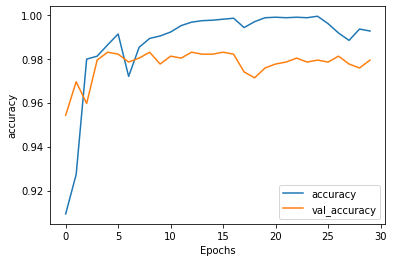

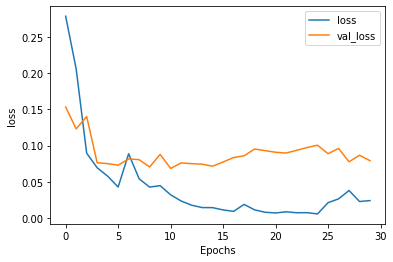

In [89]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [106]:
salida=model.predict(testing_padded)
print("predicted: ",salida[:10].T>0.6)

print("testing_labels: ",testing_labels[:10].T)
print("testing_labels_texts: ",testing_labels_texts[:10].T)

predicted:  [[False  True False False False False False False False False]]
testing_labels:  4457    False
4458     True
4459    False
4460    False
4461    False
4462    False
4463    False
4464    False
4465    False
4466    False
Name: v1, dtype: bool
testing_labels_texts:  4457     ham
4458    spam
4459     ham
4460     ham
4461     ham
4462     ham
4463     ham
4464     ham
4465     ham
4466     ham
Name: v1, dtype: object


In [110]:
sentence = ["you just won!! oportunity to get your price", "WINNER!! claim your sex prize"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded)>0.6)

[[ True]
 [ True]]


In [93]:
model.save('/content/drive/MyDrive/Colab Notebooks/spam.h5')